![portada](images/boston.png)

# Boston Housing Mini Project

## ¿Qué tienes que hacer?
- Explorar el dataset
- Buscar correlación entre variables
- Hacer plots explicativos de tus hipótesis
- Entender las variables
- Probar modelos de regresión con todas, algunas o una variable ... (según consideres)
- Revisar las métricas aprendidas en clase (R2 y R2ajustado)
- ¡¡Practicar lo que hemos visto en clase!!
- Sobre todo, disfrutar y subirte en el cohete 🚀🔥

#### ¡ EL OBJETIVO QUE TIENES ES CONSEGUIR EL MAYOR R^2 AJUSTADO !

### Librerías

Recordad que lo primero es importar las librerías

In [2]:
#importa aquí todo lo que necesites

from sklearn.datasets import load_boston



import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'

import seaborn as sns
sns.set_context('poster')
sns.set(rc={'figure.figsize': (16., 9.)})
sns.set_style('whitegrid')

# Modeling libraries
import statsmodels.formula.api as smf # welcome!!
from sklearn.linear_model import LinearRegression

import pandas as pd
np.random.seed(123)

### Datitos

Os dejamos los datos cargados 🏡

In [3]:
boston_dataset = load_boston()

In [4]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
boston['MEDV'] = boston_dataset.target

In [6]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


###### SABIENDO QUE NUESRAS VARIABLES SIGNIFICAS ESTO...

* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per 10,000 dolars
* PTRATIO - pupil-teacher ratio by town
* B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT - % lower status of the population


###### LA Y...
* MEDV - Median value of owner-occupied homes in $1000's

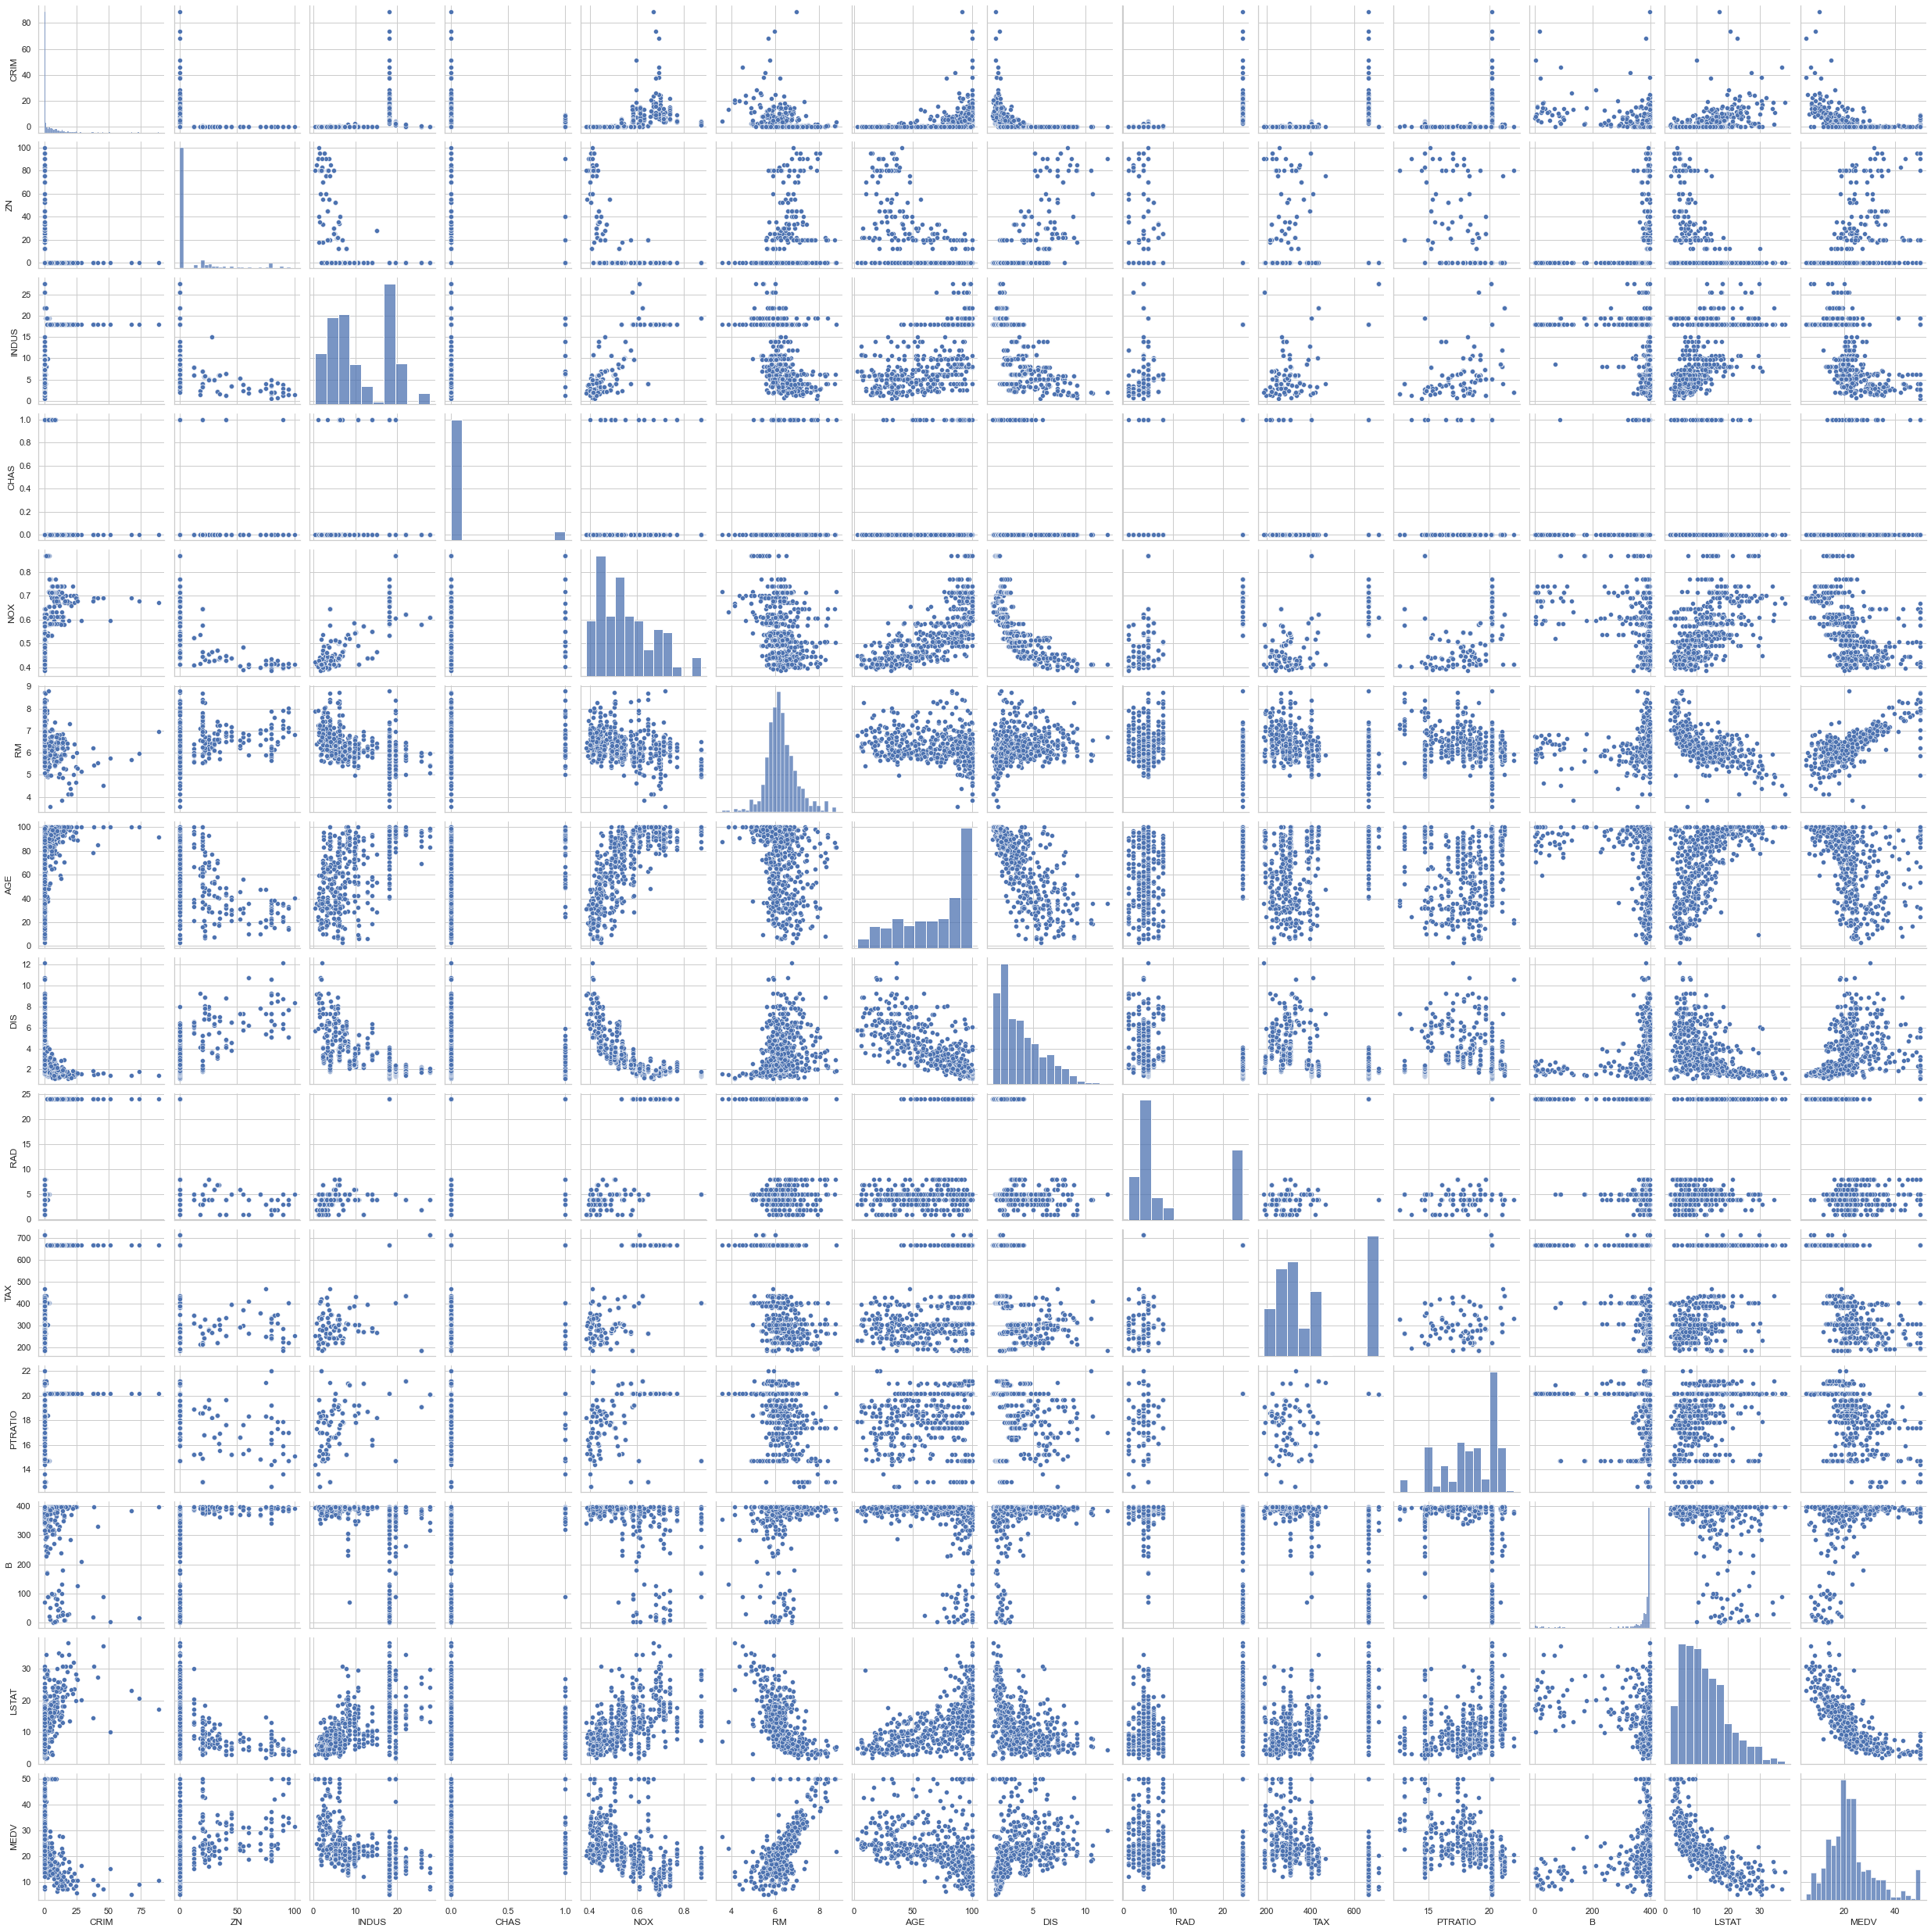

In [7]:
sns.pairplot(boston);

In [23]:
boston.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


### CASO 1
* En este caso escogeremos las siguientes variables:
    - CRIM - per capita crime rate by town
    - NOX - nitric oxides concentration (parts per 10 million)
    - MEDV - Median value of owner-occupied homes in $1000's

In [8]:
boston_1 = boston[['CRIM', 'NOX', 'MEDV']]
boston_1.head()

,CRIM,NOX,MEDV
0,0.00632,0.538,24.0
1,0.02731,0.469,21.6
2,0.02729,0.469,34.7
3,0.03237,0.458,33.4
4,0.06905,0.458,36.2


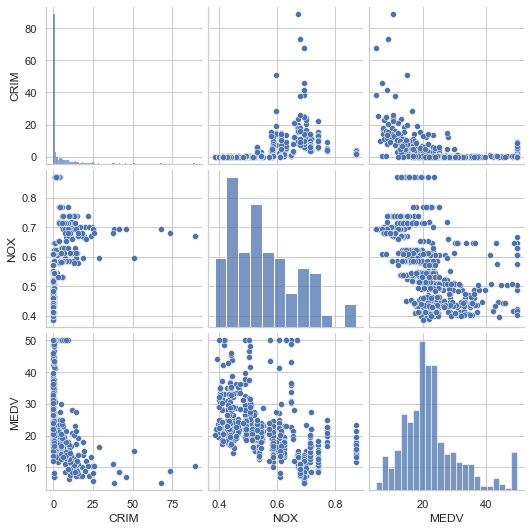

In [9]:
sns.pairplot(boston_1)

* Entre las variables que he escogido ya podemos ver visualmente que no hay apenas ningun tipo de correlación pero, vamos a indagar un poco mas

In [10]:
boston_1.corr()

,CRIM,NOX,MEDV
CRIM,1.000000,0.420972,-0.388305
NOX,0.420972,1.000000,-0.427321
MEDV,-0.388305,-0.427321,1.000000


* Aquí ya podemos ver que nuestras variables escogidas no tienen correlacion con el MEDV
* Pero comprobamos otra vez

In [11]:
corr_CRIM = smf.ols('MEDV ~ CRIM', data=boston).fit().rsquared
corr_CRIM 

0.15078046904975706

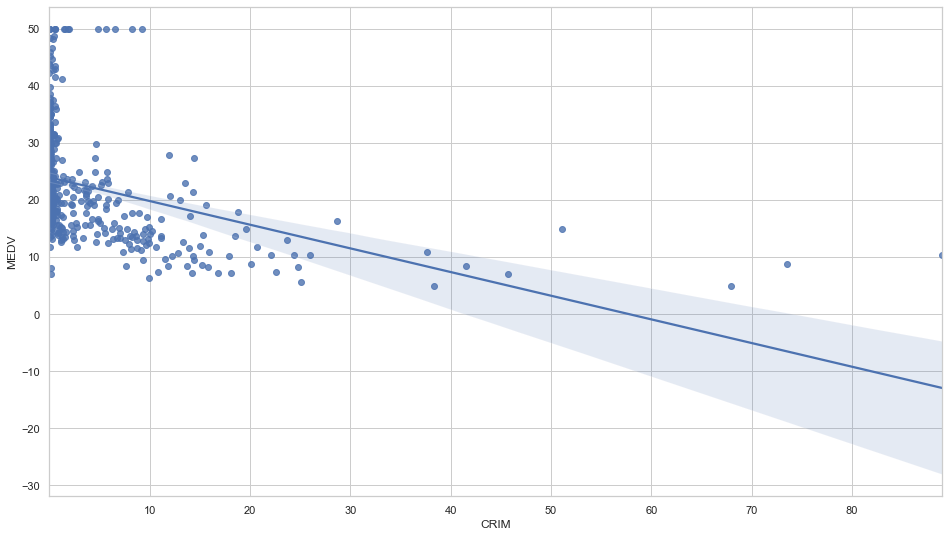

In [14]:
sns.regplot(x='CRIM', y='MEDV', data=boston);

* Apenas hay correlacion
* Parece un modelo lineal INVERSO: cuanto menos crimenes más alquileres de casas

In [33]:
corr_NOX = smf.ols('MEDV ~ NOX', data=boston).fit().rsquared
corr_NOX

0.182603042501699

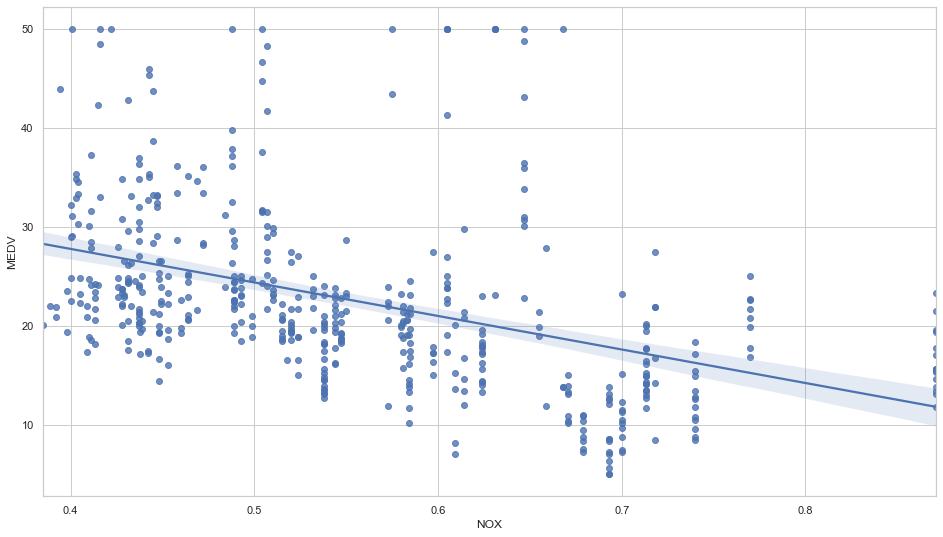

In [18]:
sns.regplot(x='NOX', y='MEDV', data=boston);

* Modelo lineal INVERSO: cuanto menos cotamninacion el alquileres de casa aumenta
* No existe un correlacion claro por lo que podemos decir que HAY variabble que influyen mucha mas y conjuntanmente al alquiler de casa en Boston 

In [36]:
result = smf.ols('MEDV ~ CRIM + NOX', data=boston).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     77.43
Date:                Tue, 24 Nov 2020   Prob (F-statistic):           4.83e-30
Time:                        17:49:55   Log-Likelihood:                -1772.3
No. Observations:                 506   AIC:                             3551.
Df Residuals:                     503   BIC:                             3563.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     37.6299      1.863     20.194      0.000      33.969      41.291
CRIM          -0.2708      0.046     -5.893      0.000      -0.361      -0.181
NOX          -25.4526      3.411     -7.461      0.000     -32.155     -18.750
==============================================================================
Omnibus:                      179.445   Durbin-Watson:                   0.717
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              507.440
Skew:                           1.745   Prob(JB):                    6.47e-111
Kurtosis:                       6.448   Cond. No.                         101.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* No tienen apenas correlacion y vamos a elegir otras dos para poder hacer un análisis estadístico más completo

### CASO 2
* En este caso escogeremos las siguientes variables:
    - RM - average number of rooms per dwelling
    - LSTAT - % lower status of the population
    - MEDV - Median value of owner-occupied homes in $1000's

In [41]:
boston_2 = boston[['RM', 'LSTAT', 'MEDV']]
boston_2.head()

,RM,LSTAT,MEDV
0,6.575,4.98,24.0
1,6.421,9.14,21.6
2,7.185,4.03,34.7
3,6.998,2.94,33.4
4,7.147,5.33,36.2


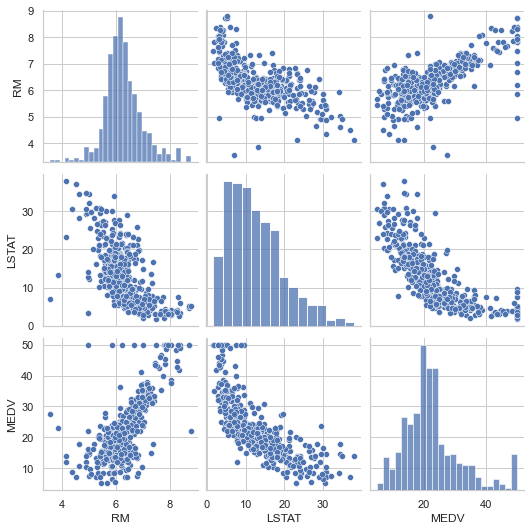

In [44]:
sns.pairplot(boston_2)

* De manera visual podemos decir que hay un poco mas de correlación en este caso que en el anterio con nuestro MEDV

In [46]:
boston_2.corr()

,RM,LSTAT,MEDV
RM,1.000000,-0.613808,0.695360
LSTAT,-0.613808,1.000000,-0.737663
MEDV,0.695360,-0.737663,1.000000


In [47]:
corr_RM = smf.ols('MEDV ~ RM', data=boston).fit().rsquared
corr_RM

0.48352545599133423

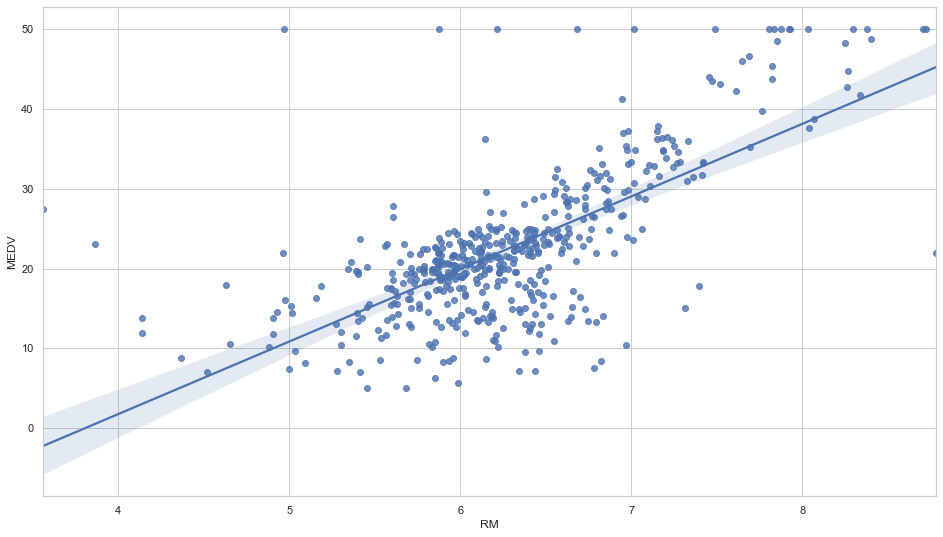

In [20]:
sns.regplot(x='RM', y='MEDV', data=boston);

* Modelo lineal NORMAL (no inverso): cuanto mas RM mas alquileres de casas
* Correlacion

In [48]:
corr_LSTAT = smf.ols('MEDV ~ LSTAT', data=boston).fit().rsquared
corr_LSTAT 

0.5441462975864797

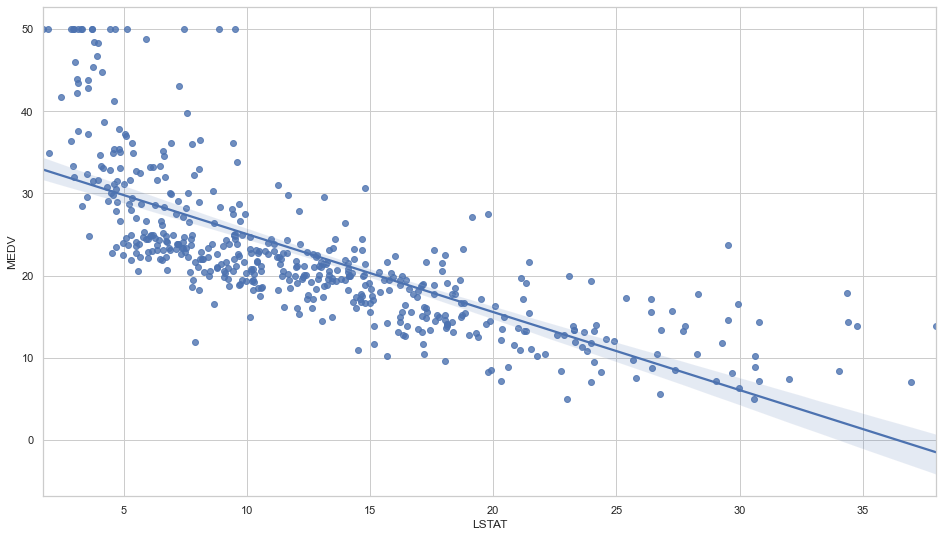

In [21]:
sns.regplot(x='LSTAT', y='MEDV', data=boston);

* Modelo lineal inverso
* correlacion


In [49]:
result = smf.ols('MEDV ~ RM + LSTAT', data=boston).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     444.3
Date:                Tue, 24 Nov 2020   Prob (F-statistic):          7.01e-112
Time:                        18:02:57   Log-Likelihood:                -1582.8
No. Observations:                 506   AIC:                             3172.
Df Residuals:                     503   BIC:                             3184.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.3583      3.173     -0.428      0.669      -7.592       4.875
RM             5.0948      0.444     11.463      0.000       4.222       5.968
LSTAT         -0.6424      0.044    -14.689      0.000      -0.728      -0.556
==============================================================================
Omnibus:                      145.712   Durbin-Watson:                   0.834
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              457.690
Skew:                           1.343   Prob(JB):                    4.11e-100
Kurtosis:                       6.807   Cond. No.                         202.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### CASO 3

In [25]:
boston_3 = boston[['RM', 'ZN', 'MEDV']]
boston_3.head()

,RM,ZN,MEDV
0,6.575,18.0,24.0
1,6.421,0.0,21.6
2,7.185,0.0,34.7
3,6.998,0.0,33.4
4,7.147,0.0,36.2


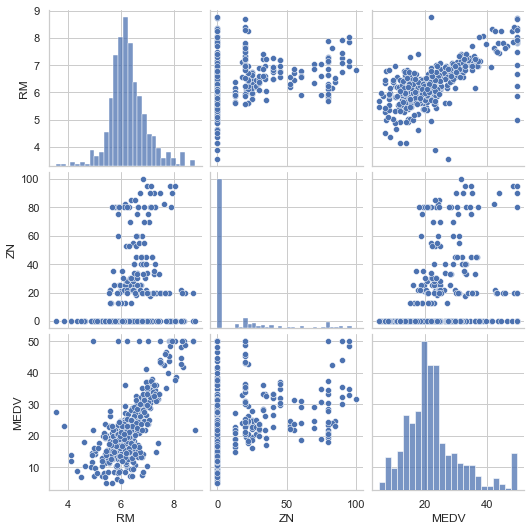

In [33]:
sns.pairplot(boston_3)

In [27]:
boston_3.corr()

,RM,ZN,MEDV
RM,1.000000,0.311991,0.695360
ZN,0.311991,1.000000,0.360445
MEDV,0.695360,0.360445,1.000000


In [28]:
corr_RM = smf.ols('MEDV ~ RM', data=boston).fit().rsquared
corr_RM

0.48352545599133423

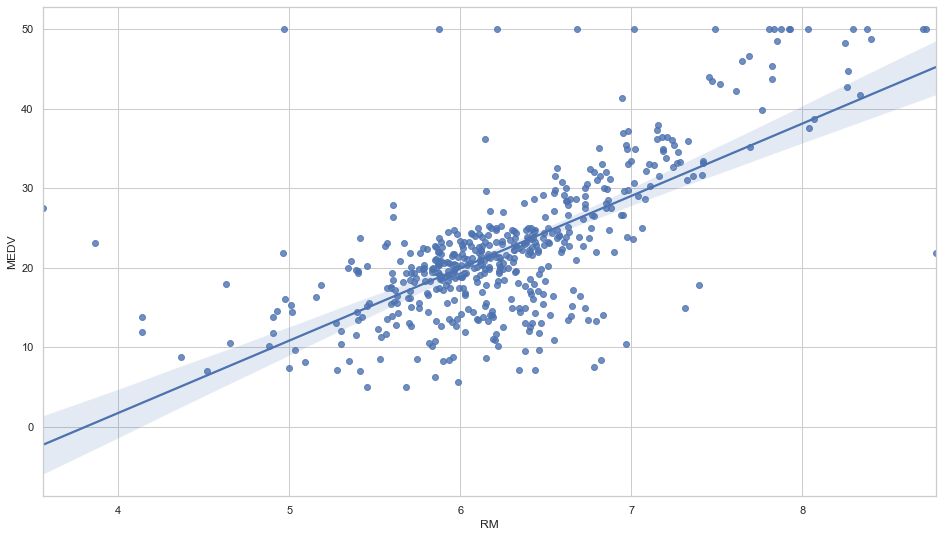

In [29]:
sns.regplot(x='RM', y='MEDV', data=boston);

In [30]:
corr_ZN = smf.ols('MEDV ~ ZN', data=boston).fit().rsquared
corr_ZN

0.12992084489428946

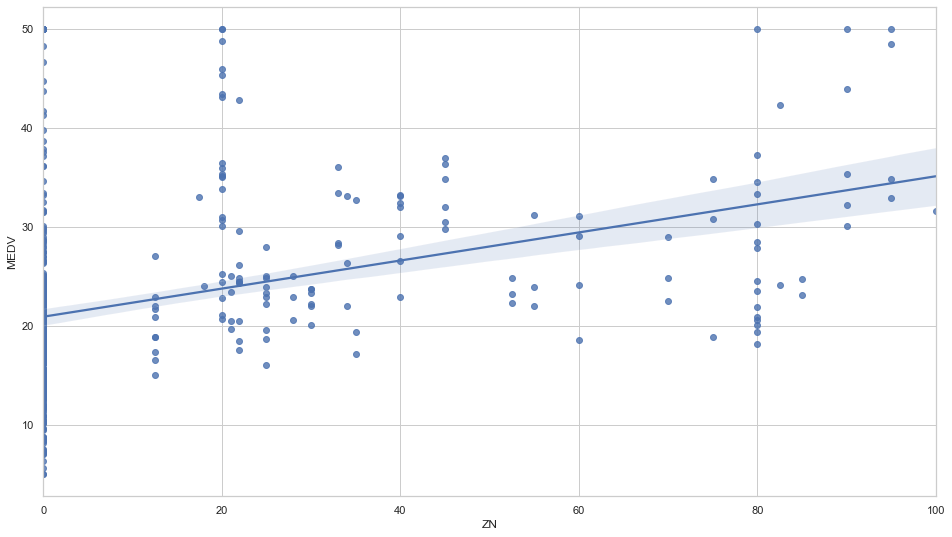

In [31]:
sns.regplot(x='ZN', y='MEDV', data=boston);

In [32]:
result = smf.ols('MEDV ~ RM + ZN', data=boston).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.506
Model:                            OLS   Adj. R-squared:                  0.504
Method:                 Least Squares   F-statistic:                     258.0
Date:                Wed, 25 Nov 2020   Prob (F-statistic):           7.90e-78
Time:                        12:06:34   Log-Likelihood:                -1661.6
No. Observations:                 506   AIC:                             3329.
Df Residuals:                     503   BIC:                             3342.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -31.3028      2.686    -11.656      0.000     -36.579     -26.026
RM             8.4529      0.432     19.584      0.000       7.605       9.301
ZN             0.0627      0.013      4.821      0.000       0.037       0.088
==============================================================================
Omnibus:                      128.368   Durbin-Watson:                   0.675
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              741.674
Skew:                           0.969   Prob(JB):                    8.86e-162
Kurtosis:                       8.606   Cond. No.                         247.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### CONCLUSION
* Me quedo con el modelo del Caso 2 porque tiene el mayor R^2 (cuanto mas se acerque a 1 más perfecto es el modelo). Tambien tiene el mayor R^2 Ajustado de mis 3 opciones

#### LINKS QUE TE EXPLICAN LOS CONCEPTOS DE R^2 Y R^2 Ajustado

* https://economipedia.com/definiciones/r-cuadrado-coeficiente-determinacion.html
* https://blog.minitab.com/es/analisis-de-regresion-como-puedo-interpretar-el-r-cuadrado-y-evaluar-la-bondad-de-ajuste